# PlotRMSD - Dynamique Structurelle 📊

---

## À propos de DeviaMetric 🌟

Le RMSD est une mesure couramment utilisée en bio-informatique pour évaluer la similarité structurelle entre deux ensembles d'atomes. Plus précisément, il quantifie la moyenne des distances entre les atomes de référence (structure fixe) et les atomes mobiles d'une trajectoire, après une superposition optimale.

---

## Instructions d'utilisation 📝

1. **Chargement des Fichiers PDB :** Utilisez les cellules de code appropriées pour charger deux fichiers PDB.
2. **Spécification des Atomes pour l'Alignement :** Déterminez quels atomes utiliser pour l'alignement (par défaut, tous les atomes sont sélectionnés).
3. **Exécution :** Exécutez les cellules pour calculer le RMSD et visualiser l'alignement.

---

## Configuration Requise 🔧

Avant de commencer, assurez-vous d'avoir installé les dépendances suivantes :
- [MDAnalysis](https://userguide.mdanalysis.org/1.0.1/index.html)
- [NGLView](https://github.com/nglviewer/nglview)



---

**Remarque :** Ce notebook est interactif et nécessite une exécution cellule par cellule pour afficher les résultats.


## I. Chargement des librairies

In [9]:
import nglview as nv
import warnings
import MDAnalysis as mda
from MDAnalysis import Universe
import matplotlib.pyplot as plt

In [10]:
# pour ignorer les warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## II. Chargement de la référence et de la simulation

Par chargement des fichiers :

In [6]:
def load_and_visualize(reference_file, simulation_file):
    
    mda_traj = Universe(reference_file, simulation_file)
    mda_view = nv.show_mdanalysis(mda_traj)

    # Afficher la vue
    display(mda_view)

# Créer les widgets pour les fichiers de référence et de simulation
reference_file_widget = widgets.FileUpload(accept='.pdb, .gro', description='Fichier de référence:', layout=widgets.Layout(width='220px'))
simulation_file_widget = widgets.FileUpload(accept='.xtc', description='Fichier de simulation:', layout=widgets.Layout(width='220px'))

# Créer le bouton pour charger et visualiser les fichiers
load_button = widgets.Button(description='Charger et Visualiser')

def on_load_button_clicked(b):
    # Obtenir les chemins des fichiers
    reference_file_path = next(iter(reference_file_widget.value))
    simulation_file_path = next(iter(simulation_file_widget.value))
    
    # Charger et visualiser les fichiers
    load_and_visualize(reference_file_path, simulation_file_path)

load_button.on_click(on_load_button_clicked)

# Afficher les widgets
display(reference_file_widget, simulation_file_widget, load_button)


FileUpload(value=(), accept='.pdb, .gro', description='Fichier de référence:', layout=Layout(width='220px'))

FileUpload(value=(), accept='.xtc', description='Fichier de simulation:', layout=Layout(width='220px'))

Button(description='Charger et Visualiser', style=ButtonStyle())

Par écrire les noms des fichiers :

In [7]:
fichier_ref = "start_prot_only.pdb"
fichier_traj = "md_prot_only_skip10.xtc"

In [8]:
load_and_visualize(fichier_ref, fichier_traj)

NGLWidget(max_frame=2000)

Pour la forme non complexée de la barstar :

In [12]:
barstar_apo_mobile = Universe("start_prot_only.pdb", "md_prot_only_skip10.xtc")
barstar_apo_ref = Universe("start_prot_only.pdb", "md_prot_only_skip10.xtc")

In [13]:
# Récupérer le type d'alignement depuis l'entrée utilisateur
input_align = input("Type d'alignement (CA, protein, all, backbone, resid): ")

# Définir une variable pour stocker la sélection
selection = None

# Mapper les choix de l'utilisateur aux critères de sélection correspondants
if input_align == "CA":
    selection = "name CA"
elif input_align == "protein":
    selection = "protein"
elif input_align == "all":
    selection = "all"
elif input_align == "backbone":
    selection = "backbone"
elif input_align == "resid":
    residue_number = input("Numéro de résidu : ")
    selection = f"resid {residue_number}"
print(f"Sélection utilisée pour l'alignement : {selection}")

Sélection utilisée pour l'alignement : name CA


In [14]:
R = rms.RMSD(barstar_apo_mobile,  # universe to align
             barstar_apo_ref,  # reference universe or atomgroup
             select=selection,  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R.run()

In [16]:
df = pd.DataFrame(R.rmsd,
                  columns=['Time (ps)', 'Time (ns)',
                           selection])
df

,Time (ps),Time (ns),name CA
0,0.0,0.000000,3.501835e-07
1,1.0,10.000000,8.950366e-01
2,2.0,20.000000,8.961086e-01
3,3.0,30.000002,8.596646e-01
4,4.0,40.000000,9.368577e-01
...,...,...,...
1996,1996.0,19960.000000,1.440696e+00
1997,1997.0,19970.000000,1.480551e+00
1998,1998.0,19980.000000,1.345616e+00
1999,1999.0,19990.000000,1.485571e+00


Text(0, 0.5, 'RMSD ($\\AA$)')

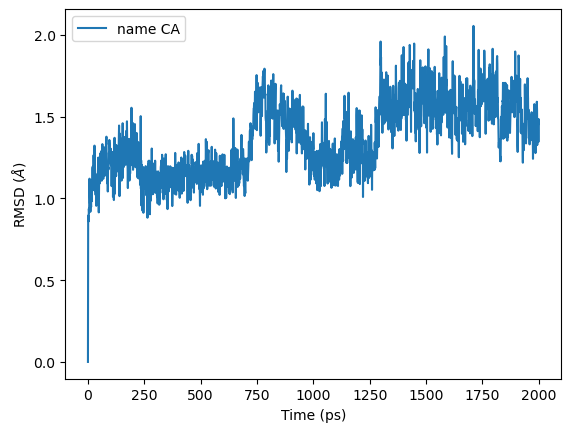

In [17]:
ax = df.plot(x='Time (ps)', y=[selection],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

Pour la forme complexée de la barstar :

In [18]:
barstar_holo_mobile = Universe("start_prot_only.gro", "md_prot_only_OK.xtc")
barstar_holo_ref = Universe("start_prot_only.gro", "md_prot_only_OK.xtc")

In [19]:
# Récupérer le type d'alignement depuis l'entrée utilisateur
input_align = input("Type d'alignement (CA, protein, all, backbone, resid): ")

# Définir une variable pour stocker la sélection
selection = None

# Mapper les choix de l'utilisateur aux critères de sélection correspondants
if input_align == "CA":
    selection = "name CA"
elif input_align == "protein":
    selection = "protein"
elif input_align == "all":
    selection = "all"
elif input_align == "backbone":
    selection = "backbone"
elif input_align == "resid":
    residue_number = input("Numéro de résidu : ")
    selection = f"resid {residue_number}"
print(f"Sélection utilisée pour l'alignement : {selection}")

Sélection utilisée pour l'alignement : name CA


In [20]:
R2 = rms.RMSD(barstar_holo_mobile,  # universe to align
             barstar_holo_ref,  # reference universe or atomgroup
             select=selection,  # group to superimpose and calculate RMSD
             ref_frame=0)  # frame index of the reference
R2.run()

In [21]:
df2 = pd.DataFrame(R2.rmsd,
                  columns=['Time (ps)', 'Time (ns)',
                           selection])

Attention, dans un fichier .gro les distances sont en nm, il faut donc les convertir en angstroms pour les comparer avec les distances des fichiers .pdb.

In [26]:
df2[selection] = df2[selection] * 10  # Conversion de nanomètres en Angstroms (1 nm = 10 Å)

Text(0, 0.5, 'RMSD ($\\AA$)')

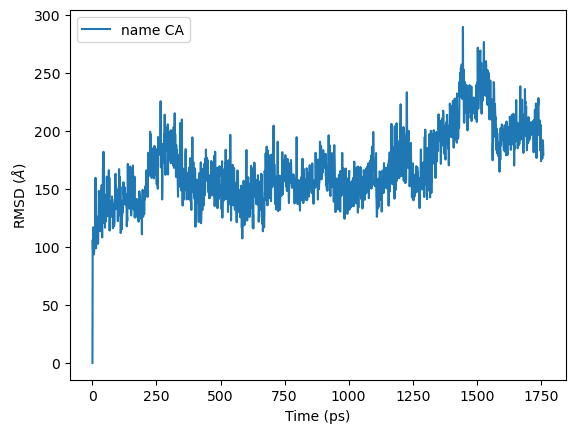

In [27]:
ax = df2.plot(x='Time (ps)', y=[selection],
             kind='line')
ax.set_ylabel(r'RMSD ($\AA$)')

RMSD croisé entre les deux formes non complexées de la barstar :

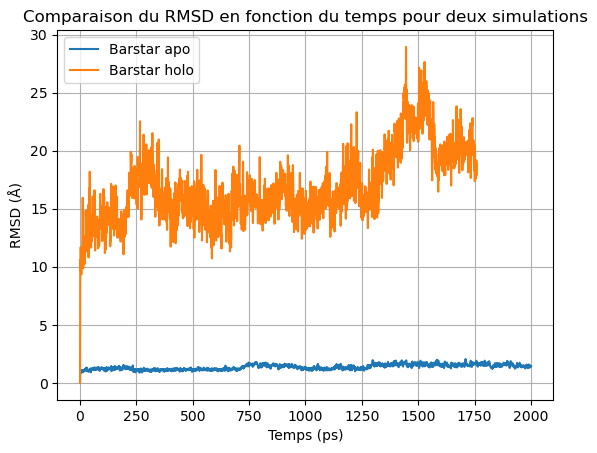

In [25]:
# Tracer les deux courbes
plt.plot(df['Time (ps)'], df[selection], label='Barstar apo')
plt.plot(df2['Time (ps)'], df2[selection], label='Barstar holo')

# Ajouter une légende
plt.legend()

# Ajouter les étiquettes des axes et le titre
plt.xlabel('Temps (ps)')
plt.ylabel('RMSD (Å)')
plt.title('Comparaison du RMSD en fonction du temps pour deux simulations')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

